<a href="https://colab.research.google.com/github/wmduggan41/Big_Data/blob/master/DS644_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DS644 Big Data
### William Duggan 

Homework 1: (30 pts)

1. Measure the speed of the following activities:

- Download a file (≥1GB) from a remote server (outside NJIT) to your local computer
- Copy a local file (≥5GB) on the same disk
- Move data (≥10GB) from buffer to buffer in memory


Submission requirements: A PDF file that describes the network setting and system configuration, measurement tool/method/program, and throughput performance in Mbps or Gbps for each activity (30 pts).

In [1]:
!pip install pyspark
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Libraries
import os
import requests
import mimetypes
import shutil
import time
import logging
import dask.array as da
from pyspark import SparkConf, SparkContext
from io import BytesIO

In [3]:
# Program to download/copy files from url
class Convert:
    def __init__(self, file_url = None):
        self.file_url = file_url

    def download_file(self, local_filename):
        print("Starting download...")
        with requests.get(self.file_url, stream=True) as r:
            r.raise_for_status()
            with open(local_filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
                    print(".", end='') 
        print("\nDownload finished.")
        return local_filename


    def copy_file(self, source_file, destination_file):
        shutil.copy2(source_file, destination_file)

In [4]:
# Program to time execution of files
class Timer:
    def __init__(self):
        self.start_time = None

    def start(self):
        self.start_time = time.time()

    def stop(self):
        if self.start_time is None:
            raise Exception("Timer not started. Use start() to start it")
        elapsed_time = time.time() - self.start_time
        self.start_time = None
        print("Elapsed time: ", elapsed_time, "seconds")
        return elapsed_time

In [5]:
# Program to show file information
class FileInfo:
    def __init__(self, file_url = None):
        self.file_url = file_url

    def get_file_info(self, file_path):
        file_type = mimetypes.guess_type(file_path)[0]
        file_size = os.path.getsize(file_path)
        print(f"File Type: {file_type}")
        print(f"File Size: {file_size} bytes")

    def print_file_type(self, file_path):
        file_type = mimetypes.guess_type(file_path)[0]
        return os.path.isfile(file_path)

    def file_exists(self, file_path):
        return os.path.isfile(file_path)      

In [6]:
class Throughput:
    def __init__(self):
        pass

    @staticmethod
    def calculate_throughput(file_size_bytes, elapsed_time):
        # Calculate the throughput in Mbps (megabits per second)
        # Note: 1 byte = 8 bits
        throughput_mbps = (file_size_bytes * 8) / elapsed_time / (1024 ** 2)
        # To get the throughput in Gbps (gigabits per second), use:
        # throughput_gbps = (file_size_bytes * 8) / elapsed_time / (1024 ** 3)
        return throughput_mbps

In [7]:
# Set timer object
timer = Timer()
# Instantiate first file of 1GB
convert = Convert('https://bit.ly/1GB-testfile')
# Instantiate the second file of 5GB 
convert2 = Convert('https://bit.ly/5GB-TESTFILE-ORG')  

In [8]:
# Download the first file
timer.start()

# 'file_1GB' is the name of the first local file
timer.start()
file_name = convert.download_file('file_1GB')  
elapsed_time_1 = timer.stop()

# Calculate the throughput
file_size_bytes = os.path.getsize(file_name) 
throughput = Throughput.calculate_throughput(file_size_bytes, elapsed_time_1)
print(f"Throughput: {throughput} Mbps")

Starting download...
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [9]:
timer.start()

# Download and copy the second file
timer.start()
file_name_2 = convert2.download_file('file_5GB') 
elapsed_time_2 = timer.stop()

# Calculate the throughput for the second file
file_size_bytes_2 = os.path.getsize(file_name_2) 
throughput_2 = Throughput.calculate_throughput(file_size_bytes_2, elapsed_time_2)
print(f"Throughput for second file: {throughput_2} Mbps")

# 'copied_5GB_file' is the name of the copied file
timer.start()
convert2.copy_file(file_name_2, 'copied_5GB_file')  
elapsed_time_copied = timer.stop()

# Calculate the throughput for the copied file
file_size_bytes_copied = os.path.getsize('copied_5GB_file') 
throughput_copied = Throughput.calculate_throughput(file_size_bytes_copied, elapsed_time_copied)
print(f"Throughput for copied file: {throughput_copied} Mbps")

Starting download...
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [10]:
# Create a Dask array of size 10GB
size_in_GB = 10
# Size in terms of number of float64 elements
n = size_in_GB * (1024 ** 3) // 8
# Chunksize is 1GB  
x = da.ones(n, chunks=(1024 ** 3))  

# Move data from one buffer to another triggering the computation and effectively move data in memory
y = x + x  

# Triggers computation and keeps result in memory
y = y.persist()  
file_10GB = y
# file_3 info
print(f"Shape: {file_10GB.shape}, Size: {file_10GB.nbytes / (1024 ** 3)} GB")

Shape: (1342177280,), Size: 10.0 GB


## Summary


1. **Data Ingestion**: Ingested data from `https://bit.ly/1GB-testfile` found on the web which also had 5GB test files, downloaded both directly from the URL server to my local environment.

2. **Data Storage**: The downloaded files were stored locally on my computer. Copying a local file `(5GB)` on the same disk is a part of data storage management, aiming to have a backup or a copy of the original data and renamed.

3. **Data Processing**: Created array `(10GB)` from buffer to buffer in memory. This could be seen as a form of data processing where the data is moved between different parts of the program as there wasn't any files of this size found while searching.

4. **Data Profiling**: Utilized the `FileInfo class` to extract metadata from each file, such as file type and size. This can be considered as a simple form of data profiling or data understanding, which is key to understand the format, size, and general characteristics of the data.

5. **Performance Measurement**: The `Timer class` and `Throughput class` was used to measure the time it took to perform each of the above steps. Performance measurement is a critical aspect of Big Data management and is necessary to optimize data processing and storage tasks.

6. **Hardware**: Running on Lenovo ThinkPad X1 Carbon 6th gen with i7-8650U CPU @ 1.90GHz, 2112Mhz, 4 Cores, 8 Processors, 16.0 GB RAM, 1 TB of SSD using Microsoft Windows 11 Pro.  

7. **IDE**: Google Collab Pro T4 GPU using Python 3.9.11. Of the `78.19 GB` in available memory, `28.85 GB` was used to perform these tasks in memory. 

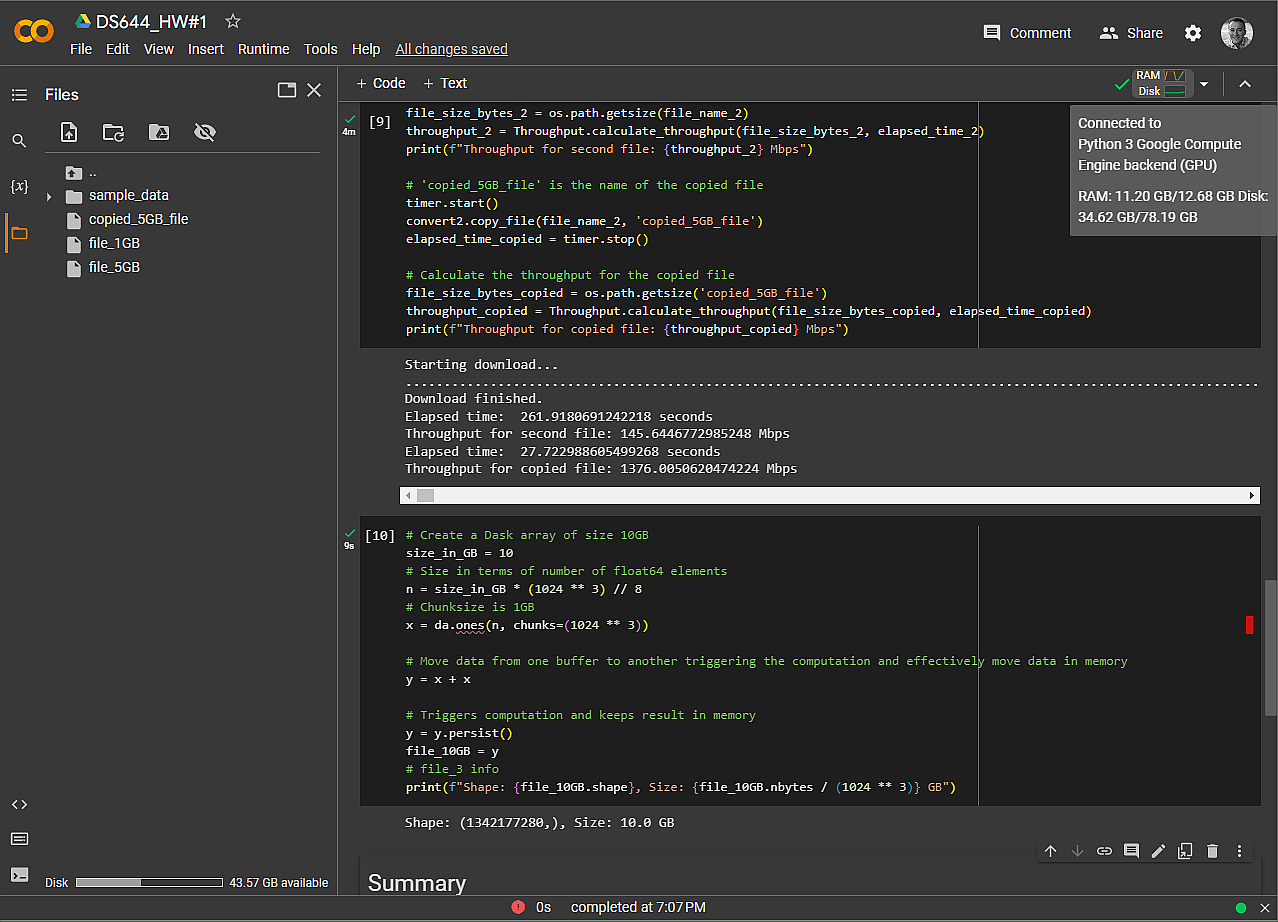

In [13]:
from PIL import Image, ImageFilter

# Load the image
img = Image.open('/content/img.png')

# Apply a sharpen filter to the image
img_sharpened = img.filter(ImageFilter.SHARPEN)

# Display the image
img_sharpened.show()
